In [24]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
data = pd.read_csv('delivery_time.csv')
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [35]:
data1 = data.rename(columns={"Delivery Time":"dt","Sorting Time":"st"})
data.head()

,dt,st,predicted
0,21.00,10,3.117833
1,13.50,4,2.570329
2,19.75,6,2.812603
3,24.00,9,3.054878
4,29.00,10,3.117833


In [36]:
data1.dtypes

dt           float64
st             int64
predicted    float64
dtype: object

In [37]:
model = smf.ols("dt~st",data=data1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 28 Jan 2022   Prob (F-statistic):           3.98e-06
Time:                        23:32:56   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
st             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

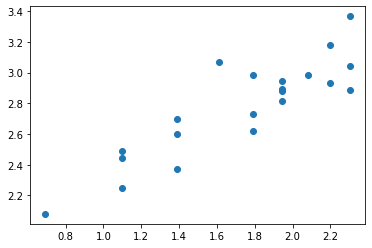

In [50]:
xlog = np.log(data1["st"])
ylog = np.log(data1["dt"])
plt.scatter(xlog,ylog)
dlog = np.log(data1)

In [56]:
m1 = smf.ols("dt~xlog",data=data1).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Fri, 28 Jan 2022   Prob (F-statistic):           2.64e-06
Time:                        23:39:49   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
xlog           9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
m2 = smf.ols("ylog~st",data=data1).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   ylog   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Fri, 28 Jan 2022   Prob (F-statistic):           1.59e-06
Time:                        23:33:18   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1214      0.103     20.601      0.000       1.906       2.337
st             0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
m3 = smf.ols("ylog~xlog",data=data1).fit()
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   ylog   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Fri, 28 Jan 2022   Prob (F-statistic):           1.60e-07
Time:                        23:39:37   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7420      0.133     13.086      0.000       1.463       2.021
xlog           0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
pred = pd.Series([2,8])
data_pred = pd.DataFrame(pred,columns=['xlog'])
data_pred

,xlog
0,2
1,8


In [44]:
m3.predict(data_pred)

0    2.937032
1    6.522166
dtype: float64

In [51]:
dlog["predicted"] = m3.fittedvalues
dlog

,dt,st,predicted,error
0,3.044522,2.302585,3.117833,2.883804
1,2.602690,1.386294,2.570329,2.391481
2,2.983153,1.791759,2.812603,2.829524
3,3.178054,2.197225,3.054878,3.041906
4,3.367296,2.302585,3.117833,3.253554
5,2.731115,1.791759,2.812603,2.528716
6,2.944439,1.945910,2.904712,2.778527
7,2.251292,1.098612,2.398432,1.960316
8,2.884801,2.302585,3.117833,2.693422
9,2.931194,2.197225,3.054878,2.753350


In [52]:
dlog["error"] = dlog["dt"]-dlog["predicted"]
dlog

,dt,st,predicted,error
0,3.044522,2.302585,3.117833,-0.073311
1,2.602690,1.386294,2.570329,0.032361
2,2.983153,1.791759,2.812603,0.170550
3,3.178054,2.197225,3.054878,0.123176
4,3.367296,2.302585,3.117833,0.249463
5,2.731115,1.791759,2.812603,-0.081488
6,2.944439,1.945910,2.904712,0.039727
7,2.251292,1.098612,2.398432,-0.147141
8,2.884801,2.302585,3.117833,-0.233032
9,2.931194,2.197225,3.054878,-0.123684
